In [34]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as mltp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score



In [4]:
df = pd.read_csv("salaries.csv")
df.head()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


In [9]:
df.isnull().sum()

Unnamed: 0       0
rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [11]:
df.shape

(397, 7)

In [ ]:
df = df.drop(columns=["Unnamed: 0"])

In [14]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [15]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [18]:
df_encoded.head()

,yrs.since.phd,yrs.service,salary,rank_AsstProf,rank_Prof,discipline_B,sex_Male
0,19,18,139750,False,True,True,True
1,20,16,173200,False,True,True,True
2,4,3,79750,True,False,True,True
3,45,39,115000,False,True,True,True
4,40,41,141500,False,True,True,True


In [38]:
X = df_encoded.drop(columns=["salary"])
Y = df_encoded["salary"]

In [22]:
X

,yrs.since.phd,yrs.service,rank_AsstProf,rank_Prof,discipline_B,sex_Male
0,19,18,False,True,True,True
1,20,16,False,True,True,True
2,4,3,True,False,True,True
3,45,39,False,True,True,True
4,40,41,False,True,True,True
...,...,...,...,...,...,...
392,33,30,False,True,False,True
393,31,19,False,True,False,True
394,42,25,False,True,False,True
395,25,15,False,True,False,True


In [39]:
Y

0      139750
1      173200
2       79750
3      115000
4      141500
        ...  
392    103106
393    150564
394    101738
395     95329
396     81035
Name: salary, Length: 397, dtype: int64

In [24]:
a = df.drop(["salary"], axis = 1).values
a

array([['Prof', 'B', 19, 18, 'Male'],
       ['Prof', 'B', 20, 16, 'Male'],
       ['AsstProf', 'B', 4, 3, 'Male'],
       ...,
       ['Prof', 'A', 42, 25, 'Male'],
       ['Prof', 'A', 25, 15, 'Male'],
       ['AsstProf', 'A', 8, 4, 'Male']], dtype=object)

In [29]:
b = df["salary"].values
b

array([139750, 173200,  79750, 115000, 141500,  97000, 175000, 147765,
       119250, 129000, 119800,  79800,  77700,  78000, 104800, 117150,
       101000, 103450, 124750, 137000,  89565, 102580,  93904, 113068,
        74830, 106294, 134885,  82379,  77000, 118223, 132261,  79916,
       117256,  80225,  80225,  77000, 155750,  86373, 125196, 100938,
       146500,  93418, 101299, 231545,  94384, 114778,  98193, 151768,
       140096,  70768, 126621, 108875,  74692, 106639, 103760,  83900,
       117704,  90215, 100135,  75044,  90304,  75243, 109785, 103613,
        68404, 100522, 101000,  99418, 111512,  91412, 126320, 146856,
       100131,  92391, 113398,  73266, 150480, 193000,  86100,  84240,
       150743, 135585, 144640,  88825, 122960, 132825, 152708,  88400,
       172272, 107008,  97032, 105128, 105631, 166024, 123683,  84000,
        95611, 129676, 102235, 106689, 133217, 126933, 153303, 127512,
        83850, 113543,  82099,  82600,  81500, 131205, 112429,  82100,
      

In [30]:
a = pd.DataFrame(a)
b = pd.DataFrame(b)

In [31]:
a

,0,1,2,3,4
0,Prof,B,19,18,Male
1,Prof,B,20,16,Male
2,AsstProf,B,4,3,Male
3,Prof,B,45,39,Male
4,Prof,B,40,41,Male
...,...,...,...,...,...
392,Prof,A,33,30,Male
393,Prof,A,31,19,Male
394,Prof,A,42,25,Male
395,Prof,A,25,15,Male


In [32]:
b

,0
0,139750
1,173200
2,79750
3,115000
4,141500
...,...
392,103106
393,150564
394,101738
395,95329


In [40]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3, random_state = 45)


In [41]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [44]:
y_pred = model.predict(x_test)


In [52]:
model.coef_


array([  471.1159681 ,  -170.6461998 , -9440.85856646, 31026.03979849,
       16542.87542925,  4881.7473842 ])

In [51]:
model.intercept_

np.float64(73074.4149725197)

In [58]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
coefficients = pd.DataFrame(model.coef_, X.columns, columns=["Coefficients"])

print("Mean Squared error =", mse)
print("R-squared ", r2)
print("\nCoeeficient: \n", coefficients)

Mean Squared error = 663339419.2580142
R-squared  0.3553750807920475

Coeeficient: 
                Coefficients
yrs.since.phd    471.115968
yrs.service     -170.646200
rank_AsstProf  -9440.858566
rank_Prof      31026.039798
discipline_B   16542.875429
sex_Male        4881.747384


In [54]:
model.score(X,Y)

0.44498492688510294

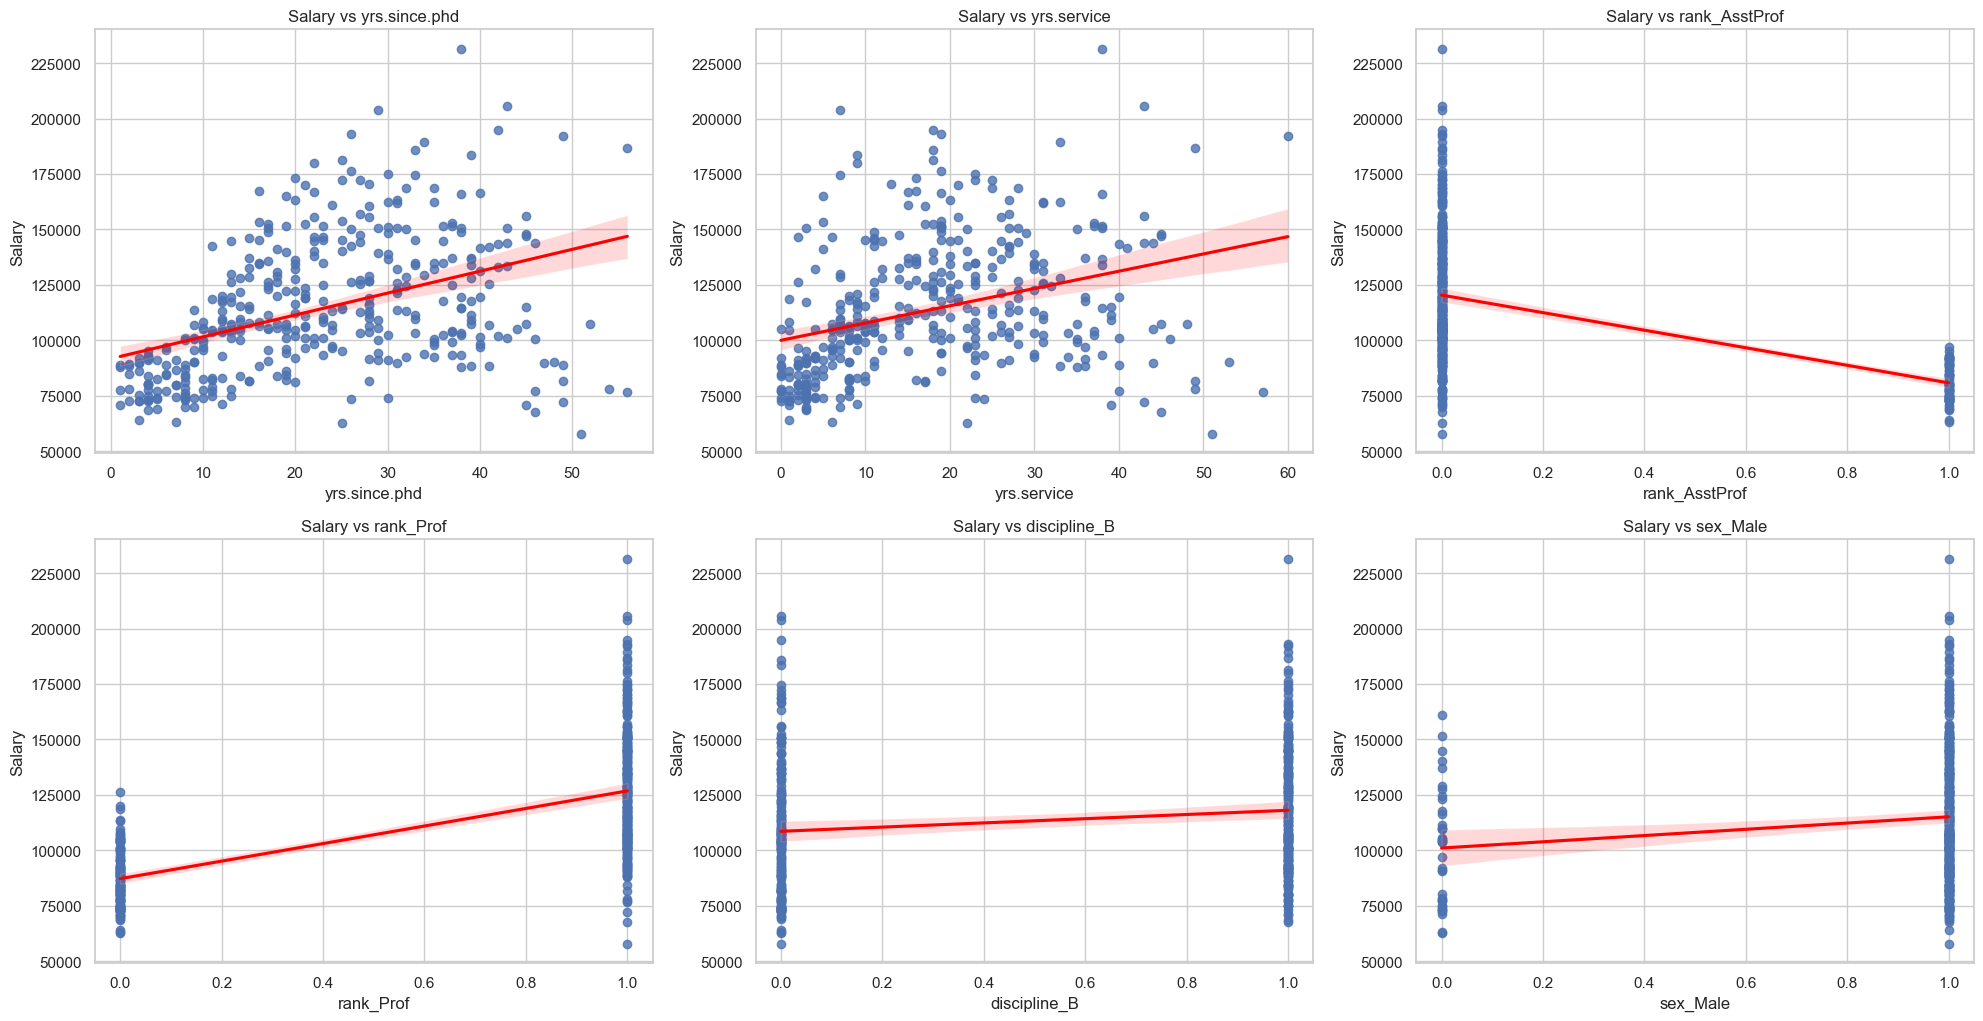

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# List of features
features = X.columns

# Create a figure and axes
plt.figure(figsize=(20, 15))

# Loop through each feature and plot
for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.regplot(x=X[feature], y=y, line_kws={"color":"red"})
    plt.title(f'Salary vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Salary')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


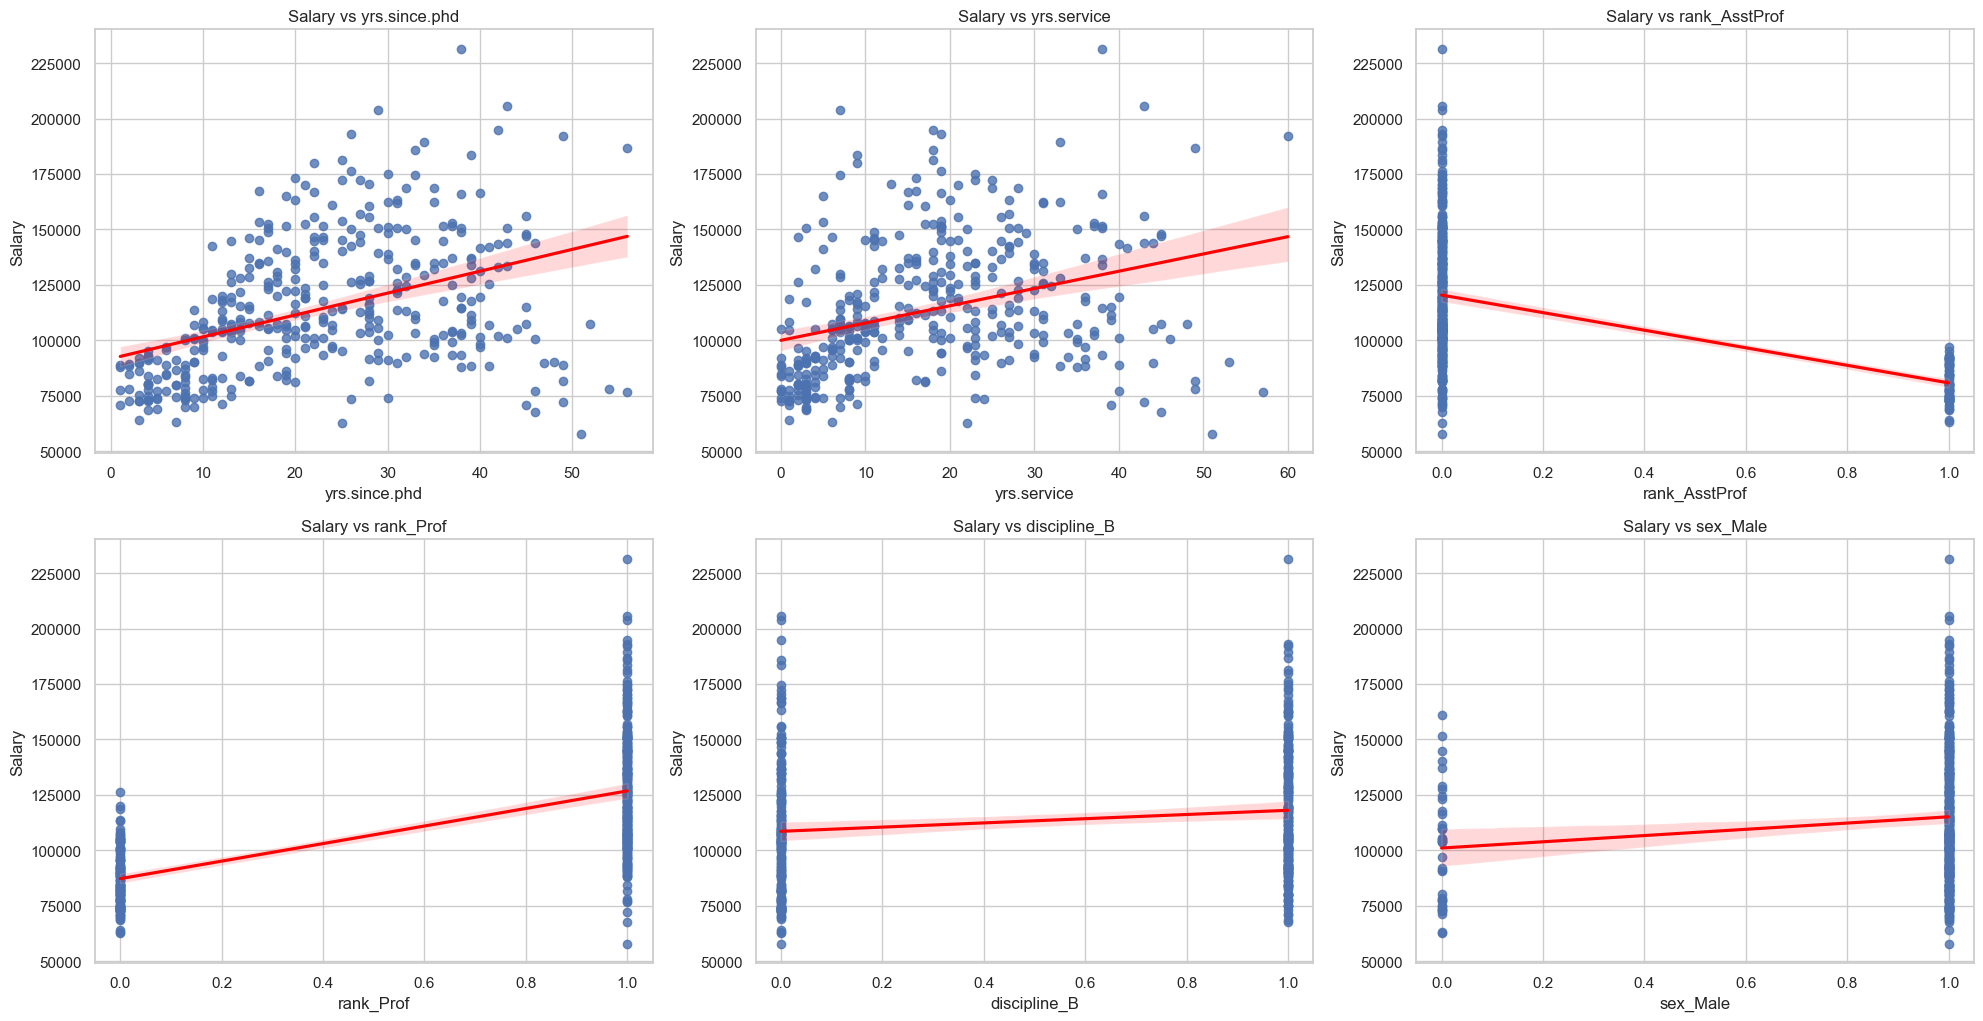

In [60]:
sns.set(style="whitegrid")

# List of features
features = X.columns

# Create a figure and axes
plt.figure(figsize=(20, 15))

# Loop through each feature and plot
for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.regplot(x=X[feature], y=y, line_kws={"color":"red"})
    plt.title(f'Salary vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Salary')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

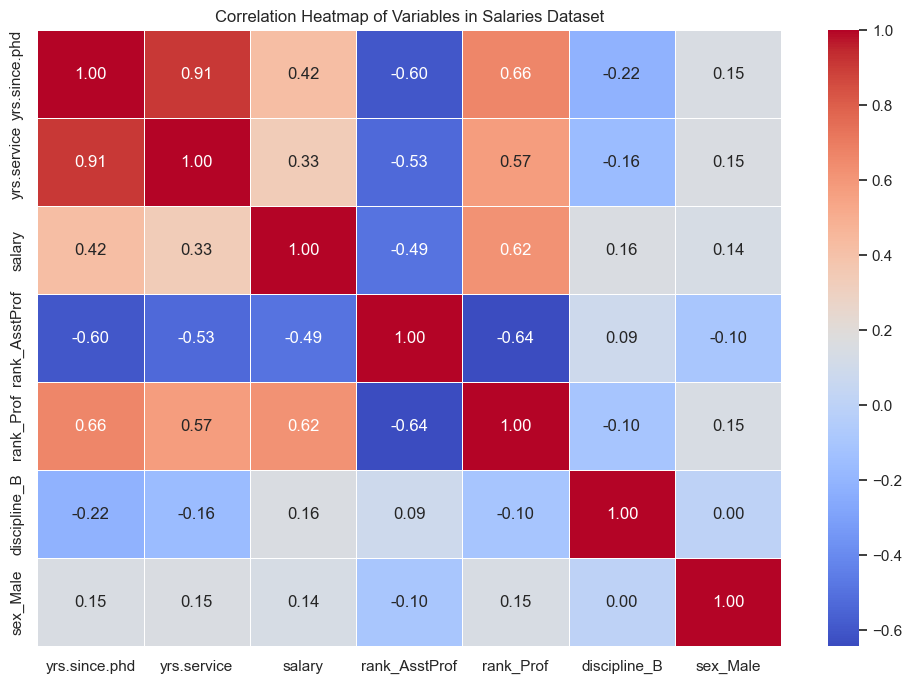

In [61]:
# Calculate the correlation matrix
corr_matrix = df_encoded.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set the title
plt.title('Correlation Heatmap of Variables in Salaries Dataset')

# Show the heatmap
plt.show()